In [ ]:
import seaborn as sea
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import string
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

## Used functions

In [ ]:
def plotFigureBoxPlot(columnName, title, dataframe):
    sea.boxplot(x=dataframe[columnName])
    plt.title(title)

In [ ]:
def features_analysis(columnName, dataframe):
    item = dataframe[columnName];
    print("1. Quantitive measurement on Central tendency:");
    print("mean:\t", item.mean());
    print("mode:\t", item.mode());
    print("median:\t", item.median());

    print("\n2. Quantitive measurement on Variability:");
    print("variance:\t", item.var());
    print("std deviation:\t", item.std());
    print("percentils (25, 50, 75):\t", item.quantile([0, 0.25, 0.5, 0.75, 1]));
    print("skrewness:\t", item.skew());
    print("kurtosis:\t", item.kurtosis());

In [ ]:
def plotBarChart(dataset, columnName):
    sea.set(style='whitegrid', palette="bright", font_scale=1.1, rc={"figure.figsize": [8, 5]})
    sea.histplot(x=columnName, data=dataset, bins=np.arange(0, 100, 5))
    plt.title(string.capwords(columnName) + " " + "distribution")

In [ ]:
def plotPieChart(data, labels, title, color=None):
    fig1, ax1 = plt.subplots()
    if (color == None):
        plt.style.use('seaborn-pastel')
    ax1.pie(data,
            labels=labels,
            autopct="%.1f%%",
            startangle=90,
            colors=color,
            pctdistance=0.85)

    fig = plt.gcf()
    ax1.axis('equal')
    plt.tight_layout()
    plt.title(title)

In [ ]:
def plotBarChartByAgeRange(dataset, columnName, label, title):
    ageRange = list(range(15, 95, 5))

    plt.figure(figsize=(18, 25))
    plt.subplot(3, 2, 1)
    dataset.groupby(pd.cut(dataset.age, ageRange))[columnName].mean().plot.bar()
    plt.ylabel(label)
    plt.title(title)


## Dataset reading

In [ ]:
fullDataset = pd.read_csv('bank-full.csv', sep=';')

# ----------------------ANALISAR MISSING VALUES E LINHAS DUPLICADAS ----------------------------


In [ ]:
fullDataset.info()

In [ ]:
#check missing values
fullDataset.count()

In [ ]:
#check if there are null values
fullDataset.isnull().sum()

In [ ]:
#check if there are Nan values
fullDataset.isna().sum()

In [ ]:
#check if there are duplicated values
fullDataset.duplicated().sum()

# ------------------------------------- ANALISAR O NOSSO TARGET --------------------------------------------


In [ ]:
fullDataset.describe()

In [ ]:
fullDataset.y.value_counts()

### Resampling Imbalanced Dataset

In [ ]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state=1)
xData, yData = rus.fit_resample(X, Y)

yData = yData.reset_index()
yData.drop('index', axis=1, inplace=True)

dataset = pd.concat([xData, yData], axis=1)

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sea.countplot(data=yData, x='y')
plt.title('Target Count')
plt.subplot(1, 2, 2)
labels = yData['y'].value_counts(sort=True).index
sizes = yData['y'].value_counts(sort=True)
plt.pie(sizes, labels=labels, autopct='%.2f')
plt.title('Target Yes and No')

In [ ]:
yData.y.value_counts()

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sea.countplot(data=fullDataset, x='y')
plt.title('Target Count')
plt.subplot(2, 2, 2)
labels = fullDataset['y'].value_counts(sort=True).index
sizes = fullDataset['y'].value_counts(sort=True)
plt.pie(sizes, labels=labels, autopct='%.2f')
plt.title('Target Yes and No')

# --------------------------------------- ANALISAR OS DADOS CATEGORICOS --------------------------------

In [ ]:
plt.subplot(2, 2, 3)
sea.countplot(data=yData, x='y')
plt.title('Target Count')

In [ ]:
plt.subplot(2, 2, 4)
labels = yData['y'].value_counts(sort=True).index
sizes = yData['y'].value_counts(sort=True)
plt.pie(sizes, labels=labels, autopct='%.2f')
plt.title('Target Yes and No')

## Features Analysis

### Age

In [ ]:
features_analysis("age", dataset)

In [ ]:
plotBarChart(dataset, "age")

In [ ]:
sea.boxplot(x=dataset["age"])
plt.title("Age quantiles")

### Job

In [ ]:
features_analysis("job", dataset)

In [ ]:
jobCounts = dataset["job"].value_counts()
jobCounts

In [ ]:
jobCountsPercentage = dataset["job"].value_counts(normalize=True) * 100
jobCountsPercentage

In [ ]:
plotBarChart(dataset, "job")

plotPieChart(jobCounts.tolist(), jobCounts.keys(), "job")

### Marital status

In [ ]:
features_analysis("marital", dataset)

In [ ]:
maritalCounts = dataset["marital"].value_counts()
maritalCounts

In [ ]:
maritalCountsPercentage = dataset["marital"].value_counts(normalize=True) * 100
maritalCountsPercentage

In [ ]:
plotBarChart(dataset, "marital")

plotPieChart(maritalCounts.tolist(), maritalCounts.keys(), "marital")

### Education

In [ ]:
educationCounts = dataset["education"].value_counts()
educationCounts

In [ ]:
educationCountsPercentage = dataset["education"].value_counts(normalize=True) * 100
educationCountsPercentage

In [ ]:
plotBarChart(dataset, "education")

plotPieChart(educationCounts.tolist(), educationCounts.keys(), "education")

### Default

In [ ]:
defaultCounts = dataset["default"].value_counts()
defaultCounts

In [ ]:
defaultCountsPercentage = dataset["default"].value_counts(normalize=True) * 100
defaultCountsPercentage

In [ ]:
plotBarChart(dataset, "default")

plotPieChart(defaultCounts.tolist(), defaultCounts.keys(), "default")

### Housing

In [ ]:
defaultCounts = dataset["default"].value_counts()
defaultCounts

In [ ]:
defaultCountsPercentage = dataset["default"].value_counts(normalize=True) * 100
defaultCountsPercentage

In [ ]:
plotBarChart(dataset, "default")

plotPieChart(defaultCounts.tolist(), defaultCounts.keys(), "default")

### Loan

In [ ]:
loanCounts = dataset["loan"].value_counts()
loanCounts

In [ ]:
loanCountsPercentage = dataset["loan"].value_counts(normalize=True) * 100
loanCountsPercentage

In [ ]:
plotBarChart(dataset, "loan")

plotPieChart(loanCounts.tolist(), loanCounts.keys(), "loan")

### Contact

In [ ]:
contactCounts = dataset["contact"].value_counts()
contactCounts

In [ ]:
contactCountsPercentage = dataset["contact"].value_counts(normalize=True) * 100
contactCountsPercentage

In [ ]:
plotBarChart(dataset, "contact")

plotPieChart(contactCounts.tolist(), contactCounts.keys(), "contact")

### Month

In [ ]:
monthCounts = dataset["month"].value_counts()
monthCounts

In [ ]:
monthCountsPercentage = dataset["month"].value_counts(normalize=True) * 100
monthCountsPercentage

In [ ]:
plotBarChart(dataset, "month")

plotPieChart(monthCounts.tolist(), monthCounts.keys(), "month")

### Day of week

In [ ]:
dayOfWeekCounts = dataset["dayOfWeek"].value_counts()
dayOfWeekCounts

In [ ]:
dayOfWeekCountsPercentage = dataset["dayOfWeek"].value_counts(normalize=True) * 100
dayOfWeekCountsPercentage

In [ ]:
plotBarChart(dataset, "dayOfWeek")

plotPieChart(dayOfWeekCounts.tolist(), dayOfWeekCounts.keys(), "dayOfWeek")

### Last contact duration

In [ ]:
durationCounts = dataset["duration"].value_counts()
durationCounts

In [ ]:
durationCountsPercentage = dataset["duration"].value_counts(normalize=True) * 100
durationCountsPercentage

In [ ]:
plotBarChart(dataset, "duration")

plotPieChart(durationCounts.tolist(), durationCounts.keys(), "duration")

### Campaign

In [ ]:
features_analysis("campaign", dataset)

In [ ]:
maritalCounts = dataset["campaign"].value_counts()
maritalCounts

In [ ]:
maritalCountsPercentage = dataset["campaign"].value_counts(normalize=True) * 100
maritalCountsPercentage

In [ ]:
plotBarChart(dataset, "campaign")

plotPieChart(maritalCounts.tolist(), maritalCounts.keys(), "campaign")

### Pdays

In [ ]:
features_analysis("pDays", dataset)

In [ ]:
maritalCounts = dataset["pDays"].value_counts()
maritalCounts

In [ ]:
maritalCountsPercentage = dataset["pDays"].value_counts(normalize=True) * 100
maritalCountsPercentage

In [ ]:
plotBarChart(dataset, "pDays")

plotPieChart(maritalCounts.tolist(), maritalCounts.keys(), "pDays")

### Previous

In [ ]:
features_analysis("previous", dataset)

In [ ]:
maritalCounts = dataset["previous"].value_counts()
maritalCounts

In [ ]:
maritalCountsPercentage = dataset["previous"].value_counts(normalize=True) * 100
maritalCountsPercentage

In [ ]:
plotBarChart(dataset, "previous")

plotPieChart(maritalCounts.tolist(), maritalCounts.keys(), "previous")

### PoutCome

In [ ]:
maritalCounts = dataset["poutcome"].value_counts()
maritalCounts

In [ ]:
maritalCountsPercentage = dataset["poutcome"].value_counts(normalize=True) * 100
maritalCountsPercentage

In [ ]:
plotBarChart(dataset, "poutcome")

plotPieChart(maritalCounts.tolist(), maritalCounts.keys(), "poutcome")

### Y - has the client subscribed a term deposit

In [ ]:
yCounts = dataset["y"].value_counts()
yCounts

In [ ]:
yCountsPercentage = dataset["y"].value_counts(normalize=True) * 100
yCountsPercentage

In [ ]:
plotBarChart(dataset, "y")

plotPieChart(yCounts.tolist(), yCounts.keys(), "y")

## Feature Analysis with "job" as a target

In [ ]:
#divide data
datasetTemp = dataset.copy()
datasetCat = datasetTemp.select_dtypes(include='object').columns.drop(["y", "job"])

In [ ]:

# Analisar o target pelos elementos categoricos por segment plots e histplots

plt.figure(figsize=(13, 15))
for i, data in enumerate(datasetCat):
    plt.subplot(4, 2, i + 1)
    sea.countplot(x=data, hue='y', data=dataset, edgecolor="black")
    plt.title("Countplot of {}  by deposit".format(data))
plt.tight_layout()
plt.show()

plt.figure(figsize=[14, 5])
sea.countplot(x='job', hue='y', edgecolor="black", data=dataset)
plt.title("Countplot of job by deposit")
plt.show()

In [ ]:
# Distribuicoes dos dados quatitativos
plt.figure(figsize=(10, 10))

for i, col in enumerate(dataset.select_dtypes(include=['int64']).columns):
    ax = plt.subplot(3, 3, i + 1)
    sea.histplot(x=dataset[col], ax=ax, kde=True)

plt.suptitle('Distribuições das variaveis quantitativas')
plt.tight_layout()
plt.show()

### Features distribution by age range

In [ ]:
plotBarChartByAgeRange(dataset, "duration", 'Media de duracao da chamada','Distribuição da média da duração de uma chamada por faixa etária')

In [ ]:
plotBarChartByAgeRange(dataset, "balance",'Media de Saldo Anual em euros','Distribuição média do Saldo anual em euros por faixa etária')

In [ ]:
plotBarChartByAgeRange(dataset, "day",'Ultimo dia de contato do mês','Distribuição do ultimo dia de contato do mês por faixa etária')

In [ ]:
plotBarChartByAgeRange(dataset, "campaign",'Numero de contactos realizados durante esta campanha para um cliente','Distribuição numero de contactos realizados durante esta campanha para um cliente por faixa etária')

In [ ]:
plotBarChartByAgeRange(dataset, "pdays",'Numero medio de dias que passou após o cliente ser contactado na ultima campanha','Distribuição do numero medio de dias que passou após o cliente ser contactado na ultima campanha por faixa etária')

In [ ]:
plotBarChartByAgeRange(dataset, "previous",'Numero médio de contactos antes desta campanha para um cliente','Distribuição do numero médio de contactos antes desta campanha para um cliente')

### Scatter plots for only numeric data

In [ ]:
# SCATTER PLOTS PARA OS DADOS NUMERICOS EM FUNCAO DO TARGET
cols = ['age','balance','day','duration','campaign','pdays','previous']
colsY=cols
colsY += ['y']
datasetNum = dataset[colsY]

plt.figure(figsize=(15,18))
for i, datasetN in enumerate(cols):
    print(i,datasetN)
    plt.subplot(4,2,i+1)
    sea.scatterplot(x=datasetN, y='y', data=datasetNum, color='yellow')
    plt.title("scatterplot of {} by target(depositos)".format(datasetN), size=20, color="white")
    plt.xlabel("{}".format(datasetN),size=15)
    plt.ylabel("Target(depositos)",size=15)
plt.tight_layout()

## Correlation Matrix

In [ ]:
dataset.corr()
plt.subplots(figsize=(18, 13))
hmap = sea.heatmap(data=dataset.corr(), annot=True, linewidths=0.5)
plt.title("Correlation Matrix", fontsize=15)
plt.tight_layout()

### Outliers

In [ ]:
# BALANCE
# VAMOS DAR DROP A TODAS AS LINHAS COM BALANCE NEGATIVO E VAMOS TAMBEM DAR DROP A LINHAS COM BALANCE MUITO ALTOS

# DAR DROP DAS LINHAS
dataset.drop(dataset[(dataset['balance']>40000)|(dataset['balance']<0)].index,inplace=True,axis=0)

In [ ]:
# DURATION
# VAMOS DAR DROP A TODAS AS LINHAS EM QUE A DURACAO DESDE O ULTIMO CONTACTO FOI ACIMA DE 2500 DIAS
dataset.drop(dataset[dataset['duration']>2500].index,inplace=True,axis=0)


In [ ]:
# CAMPAIGN
# VAMOS DAR DROP A TODAS AS LINHAS EM QUE O NUMERO DE CONTACTOS FOI ACIMA DE 40
dataset.drop(dataset[dataset['campaign']>40].index,axis=0,inplace=True)

In [ ]:
# PDAYS
# VAMOS DAR DROP A TODA A INFORMACAO dos pdays
dataset.drop("pdays",inplace=True,axis=1)

In [ ]:
# PREVIOUS
dataset.drop(dataset[dataset['previous']>30].index,axis=0,inplace=True)

## Pipeline

### to check !

####TIPOS DE Encodinm

####Bianry Encoding PARA OS VALORES binarios 0 e 1


####Ordinal Encoding para atributos ordinais que dao para enumerar

#####OneHot Encoding para

#####Dummy Encoding igual ao oneHot encoding mas N-1 gerando novas features


0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


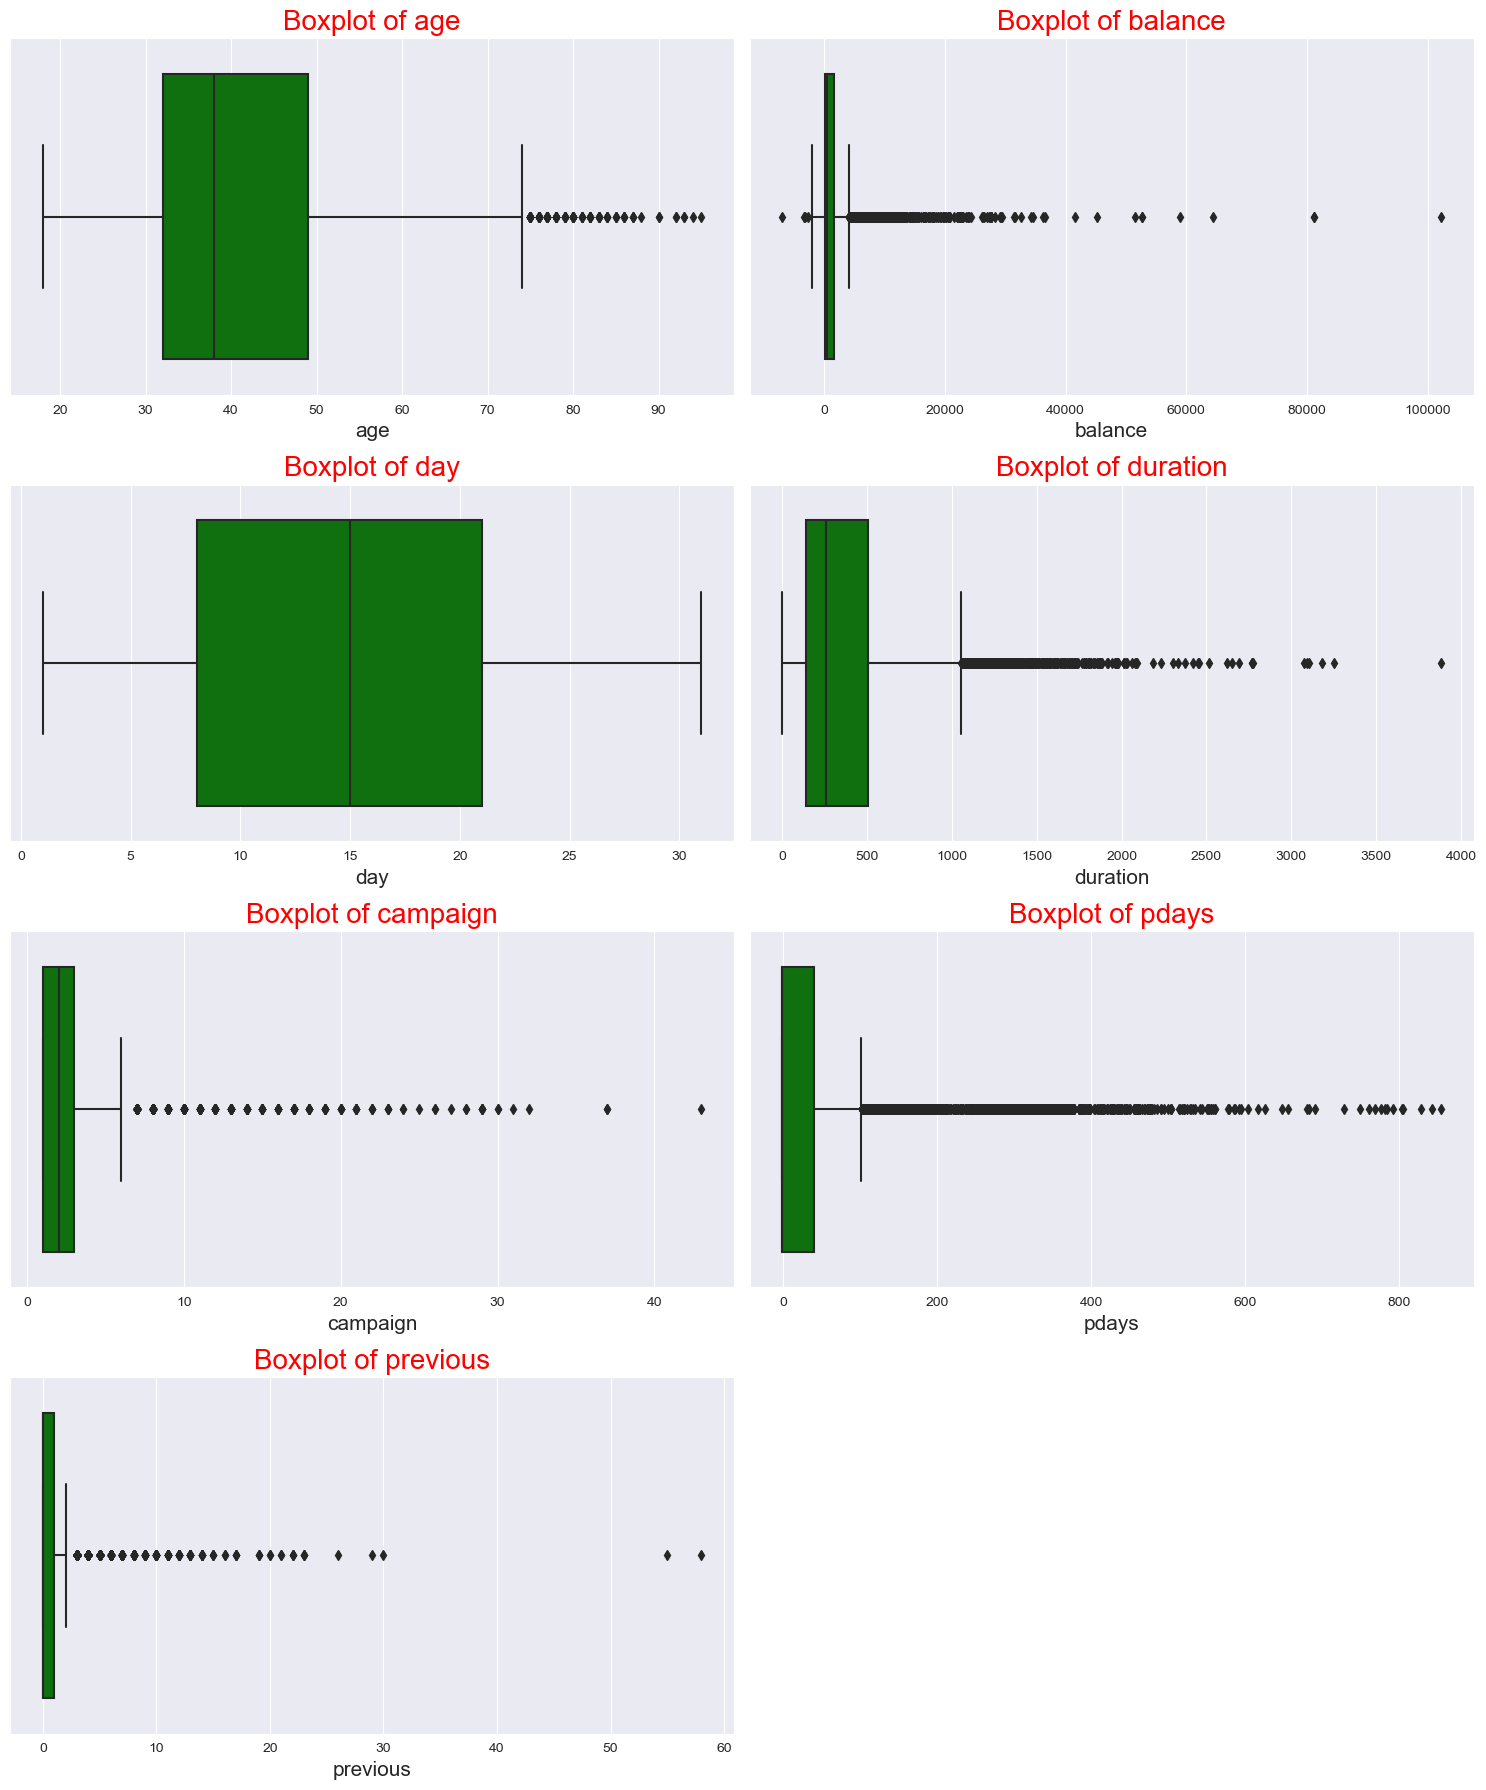

In [112]:
# BOX PLOT PARA OS DADOS NUMERICOS
plt.figure(figsize=(15,18))
for i,dados_numericos in enumerate(cols):
    print(i,dados_numericos)
    plt.subplot(4,2,i+1)
    sea.boxplot(x=dados_numericos,data=dados_num,color='green')
    plt.title("Boxplot of {}".format(dados_numericos),size=20,color="red")
    plt.xlabel("{}".format(dados_numericos),size=15)
plt.tight_layout()

# ------------------------------- TRATAR DOS OUTLIERS -----------------------

In [113]:
#Binary Encoding
from sklearn.preprocessing import LabelBinarizer

lista_bin = ["default","housing","loan", "y"]

for i in lista_bin:
    dataset[i] = LabelBinarizer().fit_transform(dataset[i].values)


In [114]:
#Ordinal Encoding
from sklearn.preprocessing import LabelEncoder

lista_ordinal=["month","contact","poutcome"]
for i in lista_ordinal:
    dataset[i]=LabelEncoder().fit_transform(dataset[i].values)

In [115]:
# Dummy Encoding
dataset = pd.get_dummies(dataset, columns= ['job','marital','education'])

In [116]:
# Reset Index e ver dataset de novo
dataset = dataset.reset_index()
dataset.drop('index', axis=1, inplace=True)
dataset

In [117]:
#Separar as Fetures do target
X = dataset.drop('y',axis=1)
Y = dataset['y']

In [118]:
from sklearn.model_selection import StratifiedShuffleSplit
Split =StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=1)
for train_i, test_i in Split.split(X,Y):
    train_dados = dataset.loc[train_i]
    testData = dataset.loc[test_i]

In [119]:
print("Ratio for train dataset")
print(trainData['y'].value_counts()/trainData.shape[0])
print()
print("ratio for test dataset")
print(testData['y'].value_counts()/testData.shape[0])

In [ ]:
x_train = trainData.drop("y",axis=1)
y_train = trainData['y']

x_test = testData.drop("y",axis=1)
y_test = testData['y']

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler

obj= StandardScaler()

x_train = obj.fit_transform(x_train)
x_test = obj.transform(x_test)